In [1]:
import pandas as pd
import numpy as np

In [95]:
df = pd.read_csv('/Users/swllms/DAT-10-14-SW/class material/Unit2/data/stocks.csv', index_col='Date', parse_dates=['Date'])

In [96]:
df.head() ###Look at pandas documentation on how to work with dates
### specify the index is the date colm using index_col =
### The parse-dates makes it number and not a string df.index.dtypes to check

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010


In [ ]:
#Grouped data extraction: summary statistics over particular months, years, etc.  
#Horizontal data extraction: looking at internal attributes of a particular date, day of week, business day, etc.
#Directional data extraction: rolling averages, momentum, etc

In [97]:
#Horizontal data extraction: use https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html
df.index
# add dayofweek to get the corspd day of week
df.index.dayofweek

Int64Index([2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
            ...
            0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
           dtype='int64', name='Date', length=1257)

In [98]:
df['End_Month'] = df.index.is_month_end
df.head()
#is just asking if the date is the last day of the month

,AAPL,GOOGL,FB,MSFT,AMZN,End_Month
Date,,,,,,
2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989,False
2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015,False
2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985,False
2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985,False
2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010,False


In [99]:
df.resample('BM')['AAPL'].sum().index #dates that are the end of the business month for AAPL

DatetimeIndex(['2014-11-28', '2014-12-31', '2015-01-30', '2015-02-27',
               '2015-03-31', '2015-04-30', '2015-05-29', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-30',
               '2015-11-30', '2015-12-31', '2016-01-29', '2016-02-29',
               '2016-03-31', '2016-04-29', '2016-05-31', '2016-06-30',
               '2016-07-29', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-30', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-28', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-29', '2017-10-31',
               '2017-11-30', '2017-12-29', '2018-01-31', '2018-02-28',
               '2018-03-30', '2018-04-30', '2018-05-31', '2018-06-29',
               '2018-07-31', '2018-08-31', '2018-09-28', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-29', '2019-04-30', '2019-05-31', '2019-06-28',
      

In [100]:
#For AAPL stock, what day of the week has the highest standard deviation in trading price?
df['Day'] = df.index.dayofweek

In [101]:
df.groupby('Day')['AAPL'].std().rank()

Day
0    1.0
1    3.0
2    2.0
3    4.0
4    5.0
Name: AAPL, dtype: float64

In [ ]:
#df.reset_index()['Date'].dt.dayofweek ### Use if the date is not the index of the file
#df = df.set_index('Date')  Use to set as the index

In [ ]:
#pd.to_datetime() Used to transform into a panda compati format

In [ ]:
##Directional data extraction:
#Looking at a value today compared to characteristics from trailing dates
#How does value today compare with values from one week ago?
#What about average values of previous two weeks?
#Useful for:Comparing rates of growth, Demand forecasting, Financial analysis
    #shift() - takes values from previous observations and inserts them into today’s date
        #Can be both unscaled or a fixed frequency
    #diff() - takes difference in values from observed value and previous one
    #pct_change() - takes percent difference from previous value

In [102]:
df.drop(['End_Month', 'Day'], axis=1, inplace =True)

In [91]:
df.head()

,AAPL,GOOGL,FB,MSFT,AMZN,End_Month
Date,,,,,,
2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989,False
2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015,False
2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985,False
2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985,False
2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010,False


In [103]:
df.shift(1) #the value in row 1 has been shift to present day

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-07,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-10,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-11,108.830002,558.229980,75.000000,48.889999,305.109985
2014-11-12,109.699997,561.289978,74.610001,48.869999,312.010010
2014-11-13,111.250000,558.250000,74.720001,48.779999,311.510010
2014-11-14,112.820000,556.440002,74.250000,49.610001,316.480011
2014-11-17,114.180000,555.190002,74.879997,49.580002,327.820007


In [104]:
df/df.shift(1) #The % from the previous day or in this case the previous row

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,0.998530,0.992337,1.005746,1.017551,1.000405
2014-11-07,1.002852,1.000236,1.004518,0.999589,1.010855
2014-11-10,0.998349,1.011616,0.992064,1.004314,1.017508
2014-11-11,1.007994,1.005482,0.994800,0.999591,1.022615
2014-11-12,1.014129,0.994584,1.001474,0.998158,0.998397
2014-11-13,1.014112,0.996758,0.993710,1.017015,1.015955
2014-11-14,1.012055,0.997754,1.008485,0.999395,1.035832
2014-11-17,0.998336,0.984600,0.991453,0.997580,0.985449


In [49]:
###df.shift(1, freq='W'), ###np.cumsum and np.cumprod are useful

In [105]:
(df/ df.shift(1)).cumprod() #% daily rates of change and mulitply them together to get growth over time

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,0.998530,0.992337,1.005746,1.017551,1.000405
2014-11-07,1.001378,0.992571,1.010290,1.017133,1.011264
2014-11-10,0.999724,1.004101,1.002272,1.021521,1.028969
2014-11-11,1.007716,1.009605,0.997060,1.021103,1.052239
2014-11-12,1.021955,1.004137,0.998530,1.019223,1.050553
2014-11-13,1.036377,1.000881,0.992249,1.036565,1.067314
2014-11-14,1.048870,0.998633,1.000668,1.035938,1.105558
2014-11-17,1.047125,0.983254,0.992115,1.033431,1.089471


In [53]:
%matplotlib inline

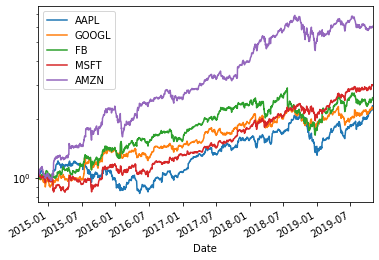

In [54]:
(df/ df.shift(1)).cumprod().plot(logy=True)

In [106]:
#diff() - takes difference in values from observed value and previous one

In [ ]:
#Among all stocks in our dataset, what 3 weeks had the highest average week over week growth?
#1. Week ending on Friday (the default ends on a sunday)
#2. Week over Week returns
#3. the average week or week return for all stocks

In [79]:
#1. Week ending on Friday (the default ends on a sunday)

In [107]:
#df.resample('W-Fri').last() ###look at resample syntax Now the weeks all end on Friday

In [108]:
#2 week over week returns shift up by 1 to get the week over week return
#df.resample('W-Fri').last() /df.resample('W-Fri').last().shift(1)

In [112]:
#3 
((df.resample('W-Fri').last()/df.resample('W-Fri').last().shift(1) -1)*100).mean(axis=1).nlargest(3)

Date
2015-07-17    10.468512
2015-04-24     9.315105
2018-11-30     7.644998
dtype: float64

In [113]:
#geometric mean accounts for growth AKA compound annual growth (you intuit think of arithmetic mean)
#geometric mean = (1.03, 99, 1.05)**1/n n= the number of occurances
#geometric mean cannot take negative values
#scipy always puts out an array
from scipy.stats import gmean

In [117]:
gmean((df.resample('W-Fri').last()/df.resample('W-Fri').last().shift(1)).dropna()) -1

array([0.00328629, 0.00321794, 0.00362363, 0.00417252, 0.00689853])

In [124]:
# what’s been the average monthly growth for AMZN?
(gmean((df.resample('M')['AMZN'].last()/df.resample('M')['AMZN'].last().shift(1)).dropna()) -1)*100

2.8152966630539122

In [123]:
# For 2019, what’s been the average monthly growth for AMZN?

df['Year'] =df.index.year # or just write it in

In [158]:
(gmean(df[df.index.year == 2019]['AMZN'].resample('M').last() / df[df.index.year == 2019]['AMZN'].resample('M').last().shift()).dropna()) -1)*100

SyntaxError: invalid syntax (<ipython-input-158-8df613b14564>, line 1)

In [ ]:
#Window Statistics: Represent how a value has changed over a particular amount of time
#Useful for capturing how unusual a particular value is at this point in time, or what sort of ‘momentum’ a certain metric has
#Calculations can be both static and dynamic

In [147]:
df['FB_Rolling'] = df.loc[:, 'FB']

In [148]:
df.rolling(3).mean()
##better way to smooth out changes over time, how a present value compares with a particular trend

,AAPL,GOOGL,FB,MSFT,AMZN,Year,FB_Rolling
Date,,,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-07,108.856667,553.153340,75.230001,48.413334,297.673330,2014.0,75.230001
2014-11-10,108.846667,553.913330,75.286667,48.756667,300.536662,2014.0,75.286667
2014-11-11,109.180000,557.113322,75.070000,48.813333,305.659993,2014.0,75.070000
2014-11-12,109.926666,559.256653,74.776667,48.846666,309.543335,2014.0,74.776667
2014-11-13,111.256666,558.659993,74.526667,49.086666,313.333344,2014.0,74.526667
2014-11-14,112.750000,556.626668,74.616666,49.323334,318.603343,2014.0,74.616666
2014-11-17,113.663333,552.756673,74.456665,49.550001,322.450002,2014.0,74.456665


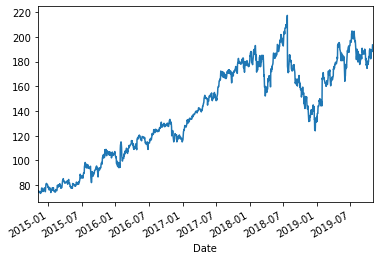

In [161]:
df['FB_Rolling'].plot()

In [139]:
#?df.rolling will show how to use a function

In [ ]:
#If we use percent difference between itself and its rolling two week average, 
#what date represented the best time to purchase Microsoft stock?
#looking for the rolling 10day 

In [149]:
(df['MSFT'] / df.loc[:, 'MSFT'].rolling(10).mean()).nsmallest(1)

Date
2015-08-25    0.894266
Name: MSFT, dtype: float64

In [150]:
df['MSFT'].rolling(3).mean().head()##This is static

Date
2014-11-05          NaN
2014-11-06          NaN
2014-11-07    48.413334
2014-11-10    48.756667
2014-11-11    48.813333
Name: MSFT, dtype: float64

In [152]:
df['MSFT'].ewm(alpha=0.5).mean().head() #exponentially wieghted moving average = ewm use a rate of decay. 

Date
2014-11-05    47.860001
2014-11-06    48.420001
2014-11-07    48.568572
2014-11-10    48.740000
2014-11-11    48.807096
Name: MSFT, dtype: float64

In [153]:
df['MSFT'].head() #look at the 2,3,4 and 5 values

Date
2014-11-05    47.860001
2014-11-06    48.700001
2014-11-07    48.680000
2014-11-10    48.889999
2014-11-11    48.869999
Name: MSFT, dtype: float64

In [156]:
(48.68 + (1 -.5)*48.7 + ((1-.5)**2)*47.86) / (1+ .5+ .25) ##Check the moving average calculated in ewm


48.56857142857143

In [ ]:
#df.resample('') is specigic to the date also look at notes re: DateOffset 
#resample and data offset see link in slack
#Date has to be the index when you resample
#df.groupby(pd.grouper(key='Order Date', freq='M'))['Sales'].sum() 
#allows you group by date when the date is not the index

In [ ]:
#group1 = df.groupby(pd.grouper(key='Order Date', freq='M'))['Sales']

#min_max = group1.sum() / group1.max() 
#dividing by the max value for each month not the max value for all months

#min_max = group1.sum() / group1.sum().max() 
#would divide sum of each month by the max value of all sales months

#min_max

In [ ]:
#shows the top 5 selling products (they will be nested so only return for one category)
#df.groupby('Category')['Product ID'].vaule_count().nlargest(5)

##targeted segmentation of each category that has the largest instead for the single cat.
##grouped = groupby('Category')['Product ID'].vaule_count().nlargest(5)
#grouped.groupby('Category').nlargest(3)